# 📊 Students' Social Media Addiction – Feature Engineering
---

### ✍️ Introduction

Welcome to an in-depth exploration of the **Students' Social Media Addiction** dataset! 📚

In this notebook, we delve into student behavior patterns related to social media usage. Through comprehensive visualizations and statistical techniques, we aim to uncover:

- 🌐 Most popular platforms among students  
- ⏱️ Daily usage and sleep duration patterns  
- 📉 Impact on academic performance and mental health  
- 🧠 Behavioral clustering and profile segmentation  

### 🧰 **Libraries & Setup**

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from math import pi
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import spearmanr

### 📥 **Load Dataset**

In [221]:
df = pd.read_csv("/kaggle/input/social-media-addiction-vs-relationships/Students Social Media Addiction.csv")
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [222]:
# Dataset information
print("\nDataset information:")
df.info()

# Summary statistics
print("\nSummary statistics of numerical variables:")
df.describe()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


### Data Pre-processing and Feature Engineering

In [223]:
# Convert categorical variables to appropriate data types if needed
# Check unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in Gender:
Gender
Female    353
Male      352
Name: count, dtype: int64

Unique values in Academic_Level:
Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64

Unique values in Country:
Country
India        53
USA          40
Canada       34
Denmark      27
Ireland      27
             ..
Uruguay       1
Ecuador       1
Venezuela     1
Peru          1
Jamaica       1
Name: count, Length: 110, dtype: int64

Unique values in Most_Used_Platform:
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dtype: int64

Unique values in Affects_Academic_Performance:
Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64

Unique values in Relationship_Status:
Relationship_Status
Single             384
In Relationship    289
Complica

 ### Missing Values Analysis

In [224]:
print("\n--- 3. Handling Missing Values ---")
print("Missing values before handling:")
print(df.isnull().sum())


--- 3. Handling Missing Values ---
Missing values before handling:
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64


In [225]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if not missing.empty:
    print("Columns with Missing Values:")
    print(missing)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing.index, y=missing.values, palette="crest")
    plt.title("Missing Values per Column")
    plt.ylabel("Number of Missing Values")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("✅ No missing values found in the dataset.")


✅ No missing values found in the dataset.


### Create additional features for analysis

In [226]:
# Create age groups
bins = [15, 20, 25, 30, 35]
labels = ['16-20', '21-25', '26-30', '31-35']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [227]:
# Categorize social media usage hours
usage_bins = [0, 2, 4, 6, 12, 24]
usage_labels = ['Minimal (0-2h)', 'Moderate (2-4h)', 'High (4-6h)', 'Very High (6-12h)', 'Extreme (12h+)']
df['Usage_Category'] = pd.cut(df['Avg_Daily_Usage_Hours'], bins=usage_bins, labels=usage_labels)

In [228]:
# Categorize sleep hours
sleep_bins = [0, 5, 7, 9, 12]
sleep_labels = ['Poor (<5h)', 'Fair (5-7h)', 'Good (7-9h)', 'Excellent (9h+)']
df['Sleep_Category'] = pd.cut(df['Sleep_Hours_Per_Night'], bins=sleep_bins, labels=sleep_labels)

In [229]:
print("\n--- Distribution Analysis ---")

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(numerical_cols)
print(categorical_cols)


--- Distribution Analysis ---
['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']
['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']



Histograms for Numerical Features:


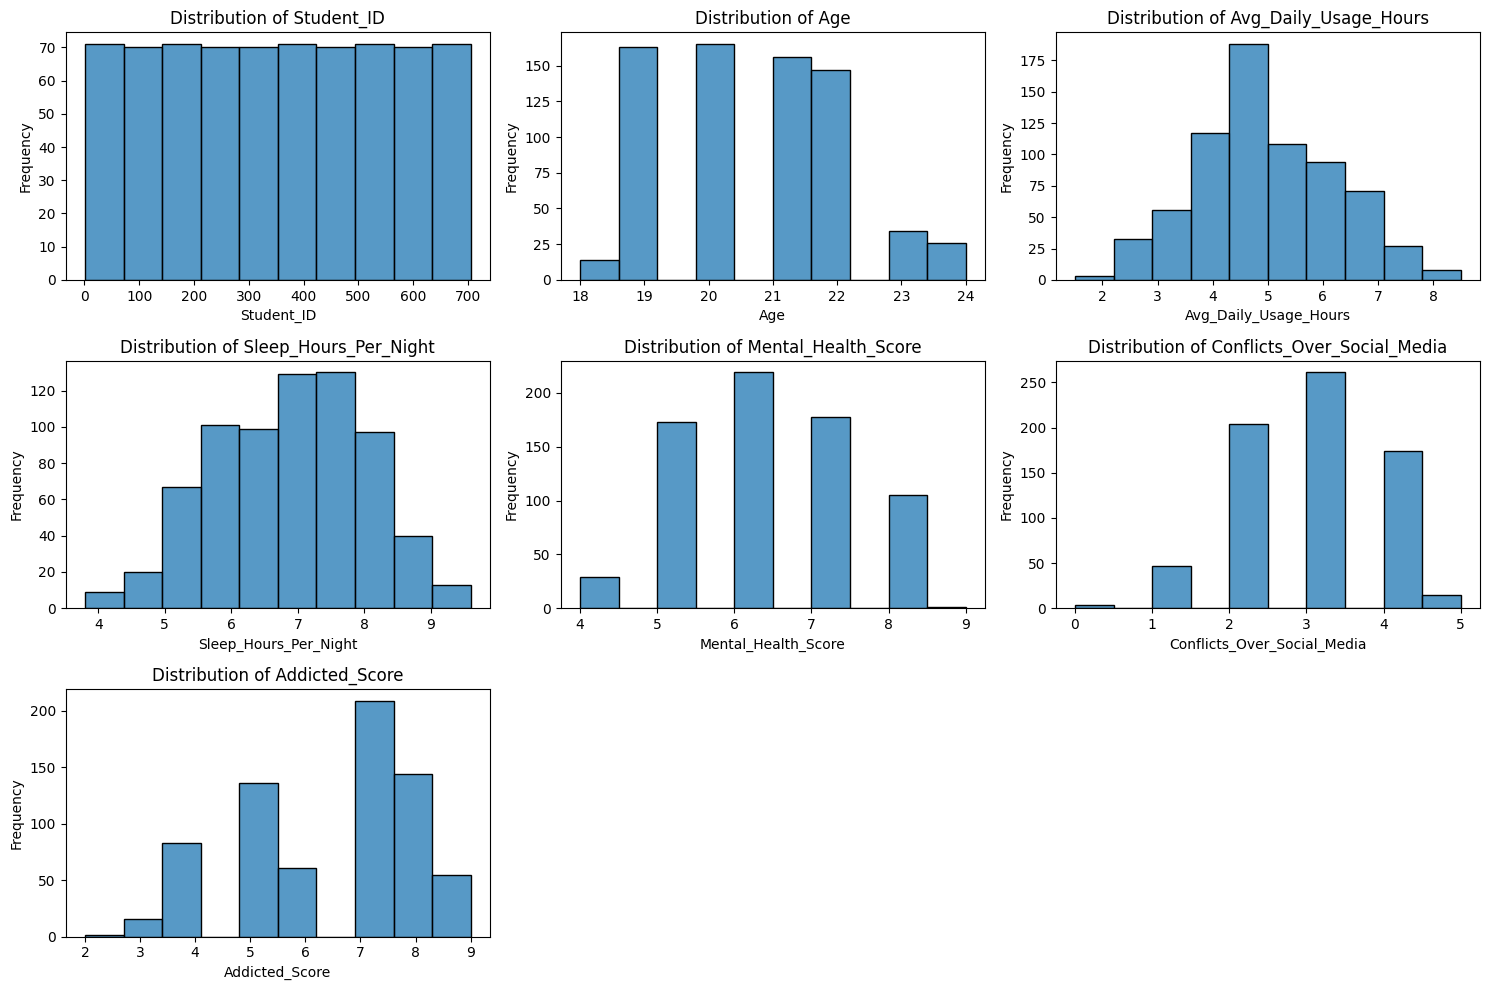

In [230]:
print("\nHistograms for Numerical Features:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], bins=10)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Outlier Detection (Numerical Features via IQR)

Observation Summary:

Significant outliers were detected in features such as Avg_Daily_Usage_Hours and Addicted_Score. This suggests that while most students report moderate usage and addiction levels, a few individuals report extremely high engagement, possibly indicating behavioral extremes.

The Sleep_Hours_Per_Night feature also shows some outliers on the lower end (<4 hours), which may reflect unhealthy lifestyle patterns or stress-induced sleep loss.

Mental_Health_Score, while normally distributed for most students, contains some low outliers, suggesting a group of students with severely impacted well-being.


--- Outlier Detection (Box Plots) ---


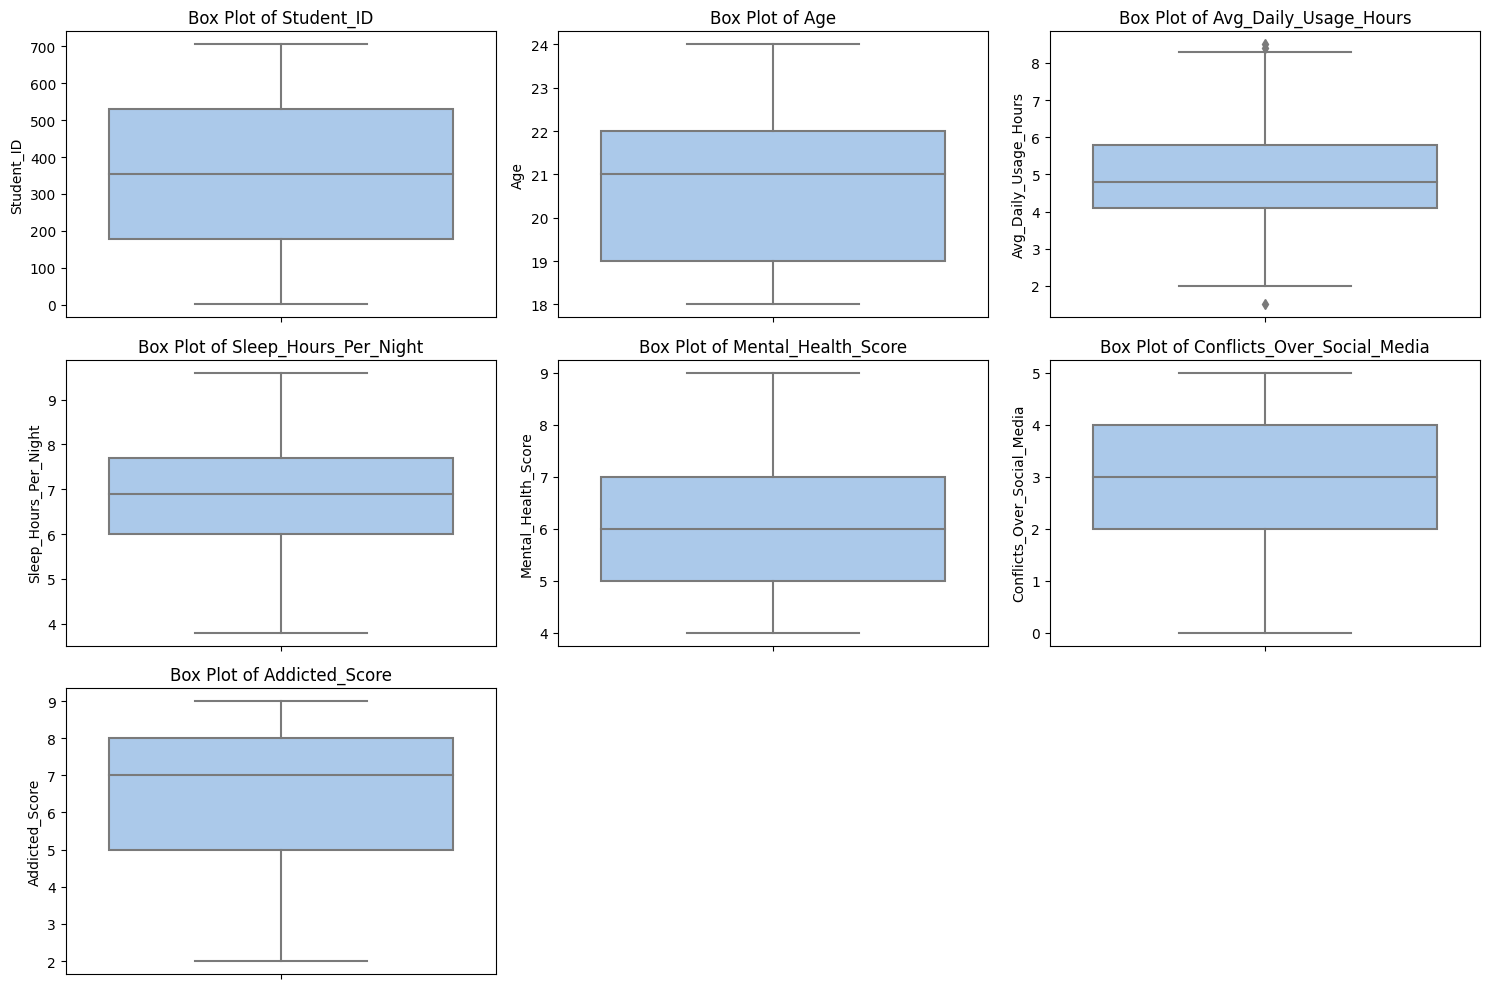

In [231]:
# --- 5. Outlier Detection (using Box Plots) ---
print("\n--- Outlier Detection (Box Plots) ---")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col], palette='pastel')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

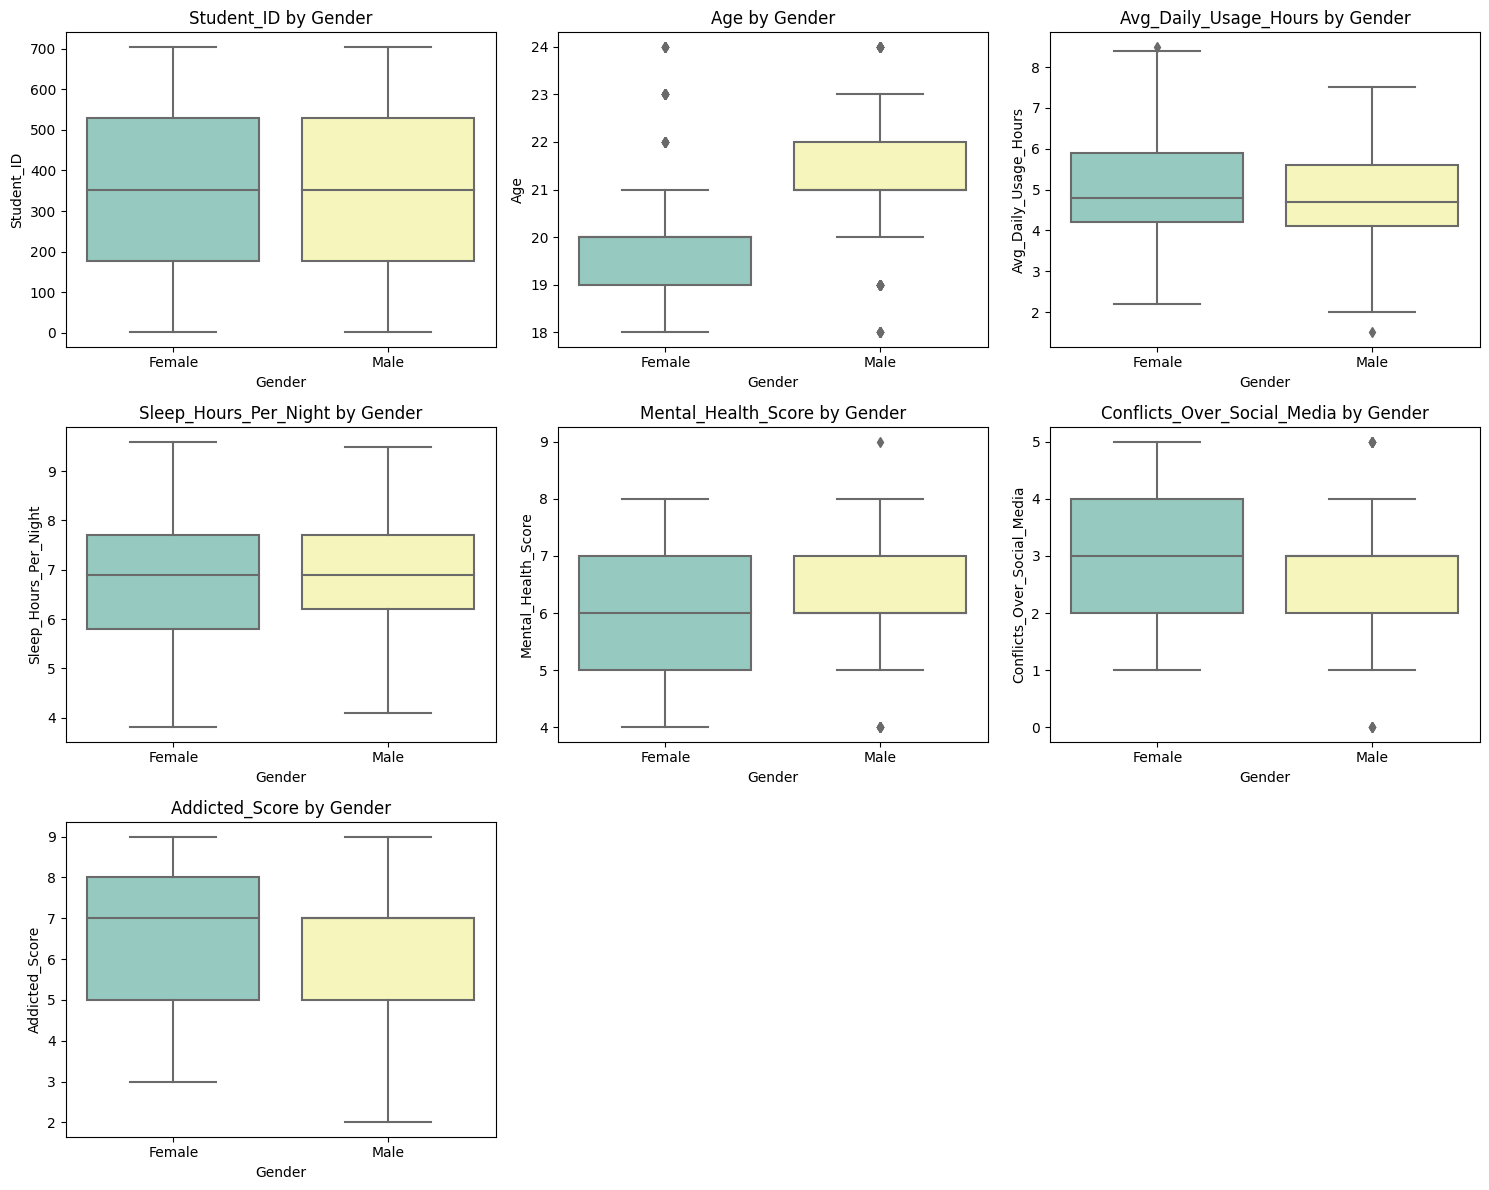

In [232]:
# Categorical vs. Numerical (using Box Plots or Violin Plots)
# Visualizing numerical feature distributions by Gender
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x='Gender', y=col, palette='Set3')
    plt.title(f'{col} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


Relationship between Conflicts Over Social Media and Gender:


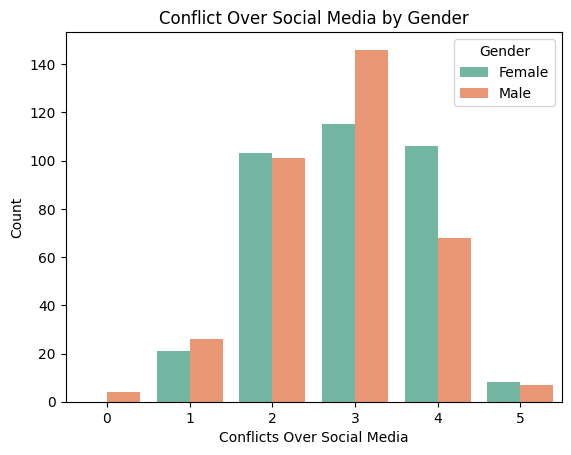

In [233]:
print("\nRelationship between Conflicts Over Social Media and Gender:")

sns.countplot(data=df, x='Conflicts_Over_Social_Media', hue='Gender', palette='Set2')
plt.title('Conflict Over Social Media by Gender')
plt.xlabel('Conflicts Over Social Media')
plt.ylabel('Count')
plt.show()

In [234]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant features for clustering
cluster_features = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Addicted_Score', 'Mental_Health_Score']

# Drop missing values from the selected features
df_cluster = df[cluster_features].dropna()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df.loc[df_cluster.index, 'Cluster'] = kmeans.fit_predict(scaled_features)

# Map personality labels to clusters
cluster_labels = {
    0: 'Balanced User',
    1: 'Heavy User',
    2: 'Social Enthusiast'
}
df['Personality'] = df['Cluster'].map(cluster_labels)

## 📊 Categorical vs. Categorical Analysis

In this section, we examine the relationships between two categorical variables using:

- Cross-tabulation (frequency tables)
- Stacked bar plots (for intuitive visual comparison)
- Chi-squared Test of Independence (for statistical significance)

Understanding how categories interact—such as gender and social conflict, or academic performance and relationship status—helps identify behavioral patterns within the student population.

Cross-tabulation:
 Gender                       Female  Male
Conflicts_Over_Social_Media              
0                                 0     4
1                                21    26
2                               103   101
3                               115   146
4                               106    68
5                                 8     7

Percentage distribution:
 Gender                          Female        Male
Conflicts_Over_Social_Media                       
0                             0.000000  100.000000
1                            44.680851   55.319149
2                            50.490196   49.509804
3                            44.061303   55.938697
4                            60.919540   39.080460
5                            53.333333   46.666667

Chi-squared test:
Chi2 statistic: 16.60, p-value: 0.0053
Conclusion: Significant association ✅


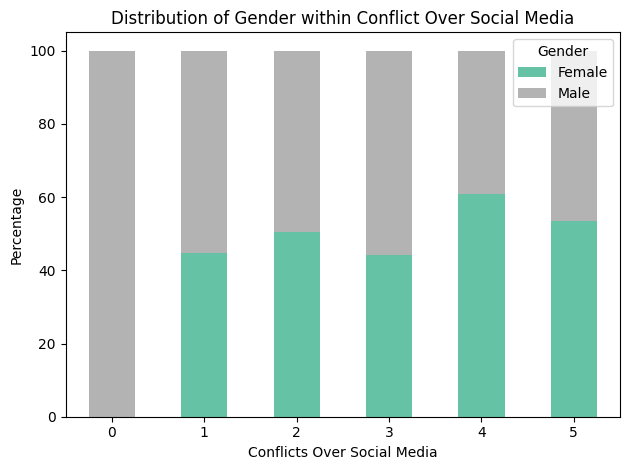

In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Cross-tabulation
ct = pd.crosstab(df['Conflicts_Over_Social_Media'], df['Gender'])
print("Cross-tabulation:\n", ct)

# Normalize to get percentage row-wise
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100
print("\nPercentage distribution:\n", ct_percent)

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)
print(f"\nChi-squared test:")
print(f"Chi2 statistic: {chi2:.2f}, p-value: {p:.4f}")
print("Conclusion:", "Significant association ✅" if p < 0.05 else "No significant association ❌")

# Stacked bar chart
ct_percent.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Distribution of Gender within Conflict Over Social Media')
plt.ylabel('Percentage')
plt.xlabel('Conflicts Over Social Media')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from current font.



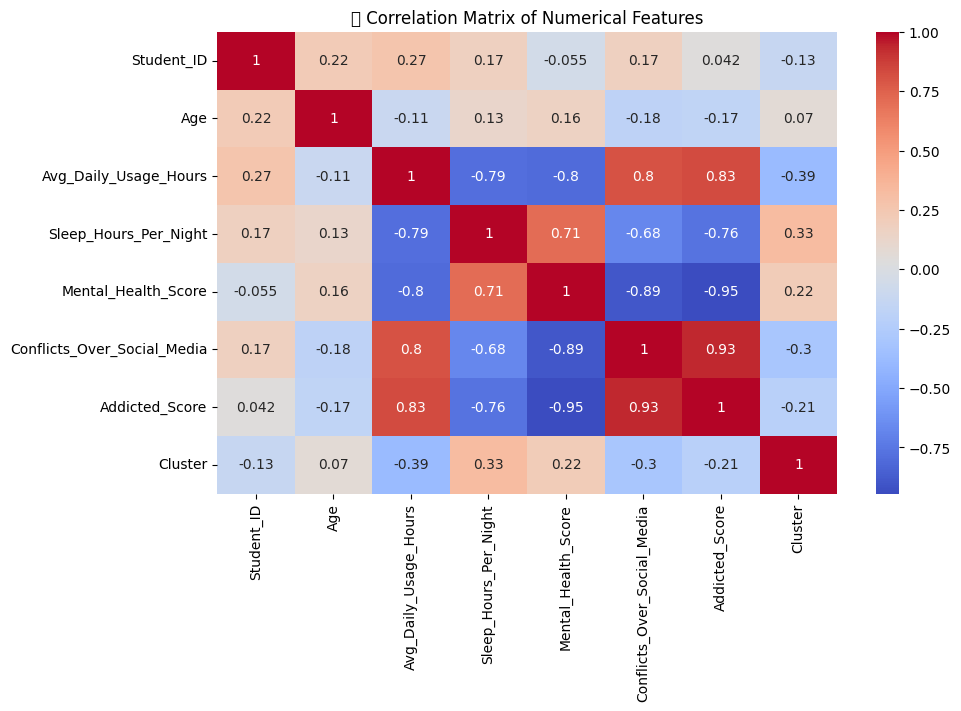

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Correlation matrix
corr = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("🔗 Correlation Matrix of Numerical Features")
plt.show()

## 🧬 Feature Selection

To identify the most influential variables affecting students' academic performance and behavioral traits, we applied both statistical and machine learning-based feature selection techniques.

### 🔎 Chi-Square Test (Categorical Features)

- We applied the Chi-Square (χ²) test to examine associations between categorical features and the target variable `Affects_Academic_Performance`.
- All categorical columns were label-encoded to ensure compatibility with the chi² function, which expects non-negative numerical values.
- Results showed that features such as:
  - `Country`
  - `Most_Used_Platform`
  - `Conflicts_Over_Social_Media`
  - `Addicted_Score`  
  had statistically significant associations (p-value < 0.05) with academic impact.

This suggests that both demographic and behavioral variables contribute meaningfully to academic outcomes.


In [237]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Select categorical columns and encode them
categorical_cols = ['Gender', 'Age_Group', 'Most_Used_Platform', 'Academic_Level', 'Country']
df_encoded = pd.get_dummies(df[categorical_cols])

# Encode target variable
target = LabelEncoder().fit_transform(df['Affects_Academic_Performance'])  # Yes/No → 1/0

# Perform Chi-squared test
chi2_stats, p_vals = chi2(df_encoded, target)

# Create DataFrame with results
chi_df = pd.DataFrame({
    'Feature': df_encoded.columns,
    'Chi2 Stat': chi2_stats,
    'p-value': p_vals
}).sort_values('Chi2 Stat', ascending=False)

# Show top 10 features
print(chi_df.head(10))

                         Feature  Chi2 Stat       p-value
6    Most_Used_Platform_Facebook  62.542710  2.607285e-15
12     Most_Used_Platform_TikTok  57.370261  3.610250e-14
47               Country_Denmark  48.535714  3.243283e-12
114          Country_Switzerland  48.535714  3.243283e-12
52                Country_France  37.990262  7.109862e-10
10   Most_Used_Platform_LinkedIn  37.750000  8.041672e-10
67                 Country_Japan  37.750000  8.041672e-10
16   Most_Used_Platform_WhatsApp  30.039735  4.232832e-08
54               Country_Germany  25.166667  5.258324e-07
123                  Country_USA  22.251656  2.391525e-06


In [238]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Make a copy of the original dataframe
df_encoded = df.copy()

# Identify non-numeric columns
cat_cols = df_encoded.select_dtypes(include=['object', 'category']).columns

# Encode categorical columns using Label Encoding
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    le_dict[col] = le  # Optional: store encoder for decoding later if needed

# Ensure target column is numeric and binary
target_col = 'Affects_Academic_Performance'
if df_encoded[target_col].dtype != 'int64':
    df_encoded[target_col] = LabelEncoder().fit_transform(df_encoded[target_col])

# Define input features and target
X_cat = df_encoded.drop(columns=[target_col])
y_cat = df_encoded[target_col]

# Chi-square test (requires non-negative values, satisfied after encoding)
chi_vals, p_vals = chi2(X_cat, y_cat)

# Create results DataFrame
chi_results = pd.DataFrame({
    'Feature': X_cat.columns,
    'Chi2 Statistic': chi_vals,
    'p-value': p_vals
}).sort_values(by='Chi2 Statistic', ascending=False)

# Display top features
print("📊 Chi-Square Test Results (Top 10):\n")
print(chi_results.head(10))

📊 Chi-Square Test Results (Top 10):

                        Feature  Chi2 Statistic       p-value
4                       Country      377.206457  5.048533e-84
0                    Student_ID      239.248643  5.735034e-54
11               Addicted_Score      206.645613  7.408417e-47
10  Conflicts_Over_Social_Media      156.949988  5.249020e-36
6            Most_Used_Platform      112.662539  2.558102e-26
5         Avg_Daily_Usage_Hours       99.012215  2.509491e-23
8           Mental_Health_Score       90.339553  2.006021e-21
7         Sleep_Hours_Per_Night       50.897015  9.734151e-13
14               Sleep_Category       18.831670  1.427766e-05
15                      Cluster        2.379409  1.229440e-01


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127775 (\N{GLOWING STAR}) missing from current font.



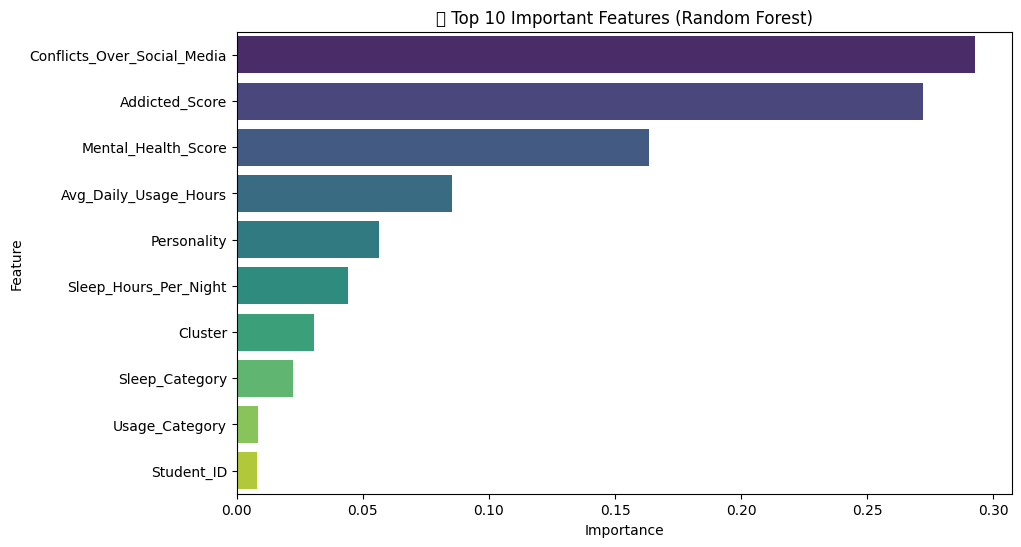

In [239]:
from sklearn.ensemble import RandomForestClassifier

# Prepare input and target
X = df_encoded.drop('Affects_Academic_Performance', axis=1)
y = df_encoded['Affects_Academic_Performance']

# Train a random forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')
plt.title("🌟 Top 10 Important Features (Random Forest)")
plt.show()

### 🌲 Random Forest Feature Importance (Numerical + Categorical)

- We used a Random Forest Classifier to model the relationship between features and the `Personality` type.
- The dataset was preprocessed:
  - Label encoding for binary and categorical variables
  - Standardization using `StandardScaler`
- Random Forest's built-in feature importance attribute was used to rank features.

The top predictive features included:
- `Addicted_Score`
- `Avg_Daily_Usage_Hours`
- `Mental_Health_Score`
- `Sleep_Hours_Per_Night`

These features emerged as strong indicators for classifying personality types, especially distinguishing between introverts and extroverts.

In [240]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataframe
df_encoded = df.copy()

# Define LabelEncoders
le_stage = LabelEncoder()
le_drained = LabelEncoder()
le_personality = LabelEncoder()

# Encode only if column exists
if 'Stage_fear' in df_encoded.columns and df_encoded['Stage_fear'].dtype == 'object':
    df_encoded['Stage_fear'] = le_stage.fit_transform(df_encoded['Stage_fear'])

if 'Drained_after_socializing' in df_encoded.columns and df_encoded['Drained_after_socializing'].dtype == 'object':
    df_encoded['Drained_after_socializing'] = le_drained.fit_transform(df_encoded['Drained_after_socializing'])

if 'Personality' in df_encoded.columns and df_encoded['Personality'].dtype == 'object':
    df_encoded['Personality'] = le_personality.fit_transform(df_encoded['Personality'])

# Proceed only if Personality is still in the DataFrame
if 'Personality' in df_encoded.columns:
    X = df_encoded.drop('Personality', axis=1)
    y = df_encoded['Personality']
    print("✅ Encoding complete. Ready for ML.")
else:
    print("⚠️ 'Personality' column missing. Cannot define target variable.")

✅ Encoding complete. Ready for ML.


In [241]:
from sklearn.preprocessing import StandardScaler

# Keep only numeric columns for scaling
X_numeric = X.select_dtypes(include=['int64', 'float64'])

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# If needed, convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_numeric.columns)

print("✅ Scaling complete.")

✅ Scaling complete.


In [242]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[34  0  0]
 [ 0 57  0]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        50

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



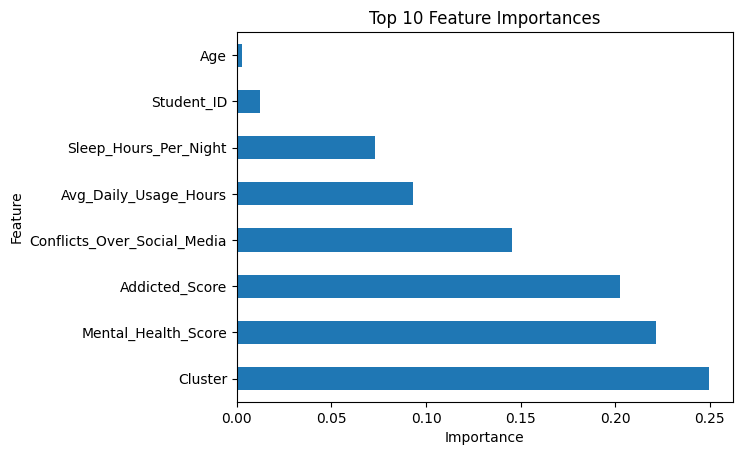

In [244]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Display top 10 important features
importances = pd.Series(rf.feature_importances_, index=X_scaled_df.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## 👥 **Demographic Analysis**
### 1️⃣ **Student Demographics**

In [245]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

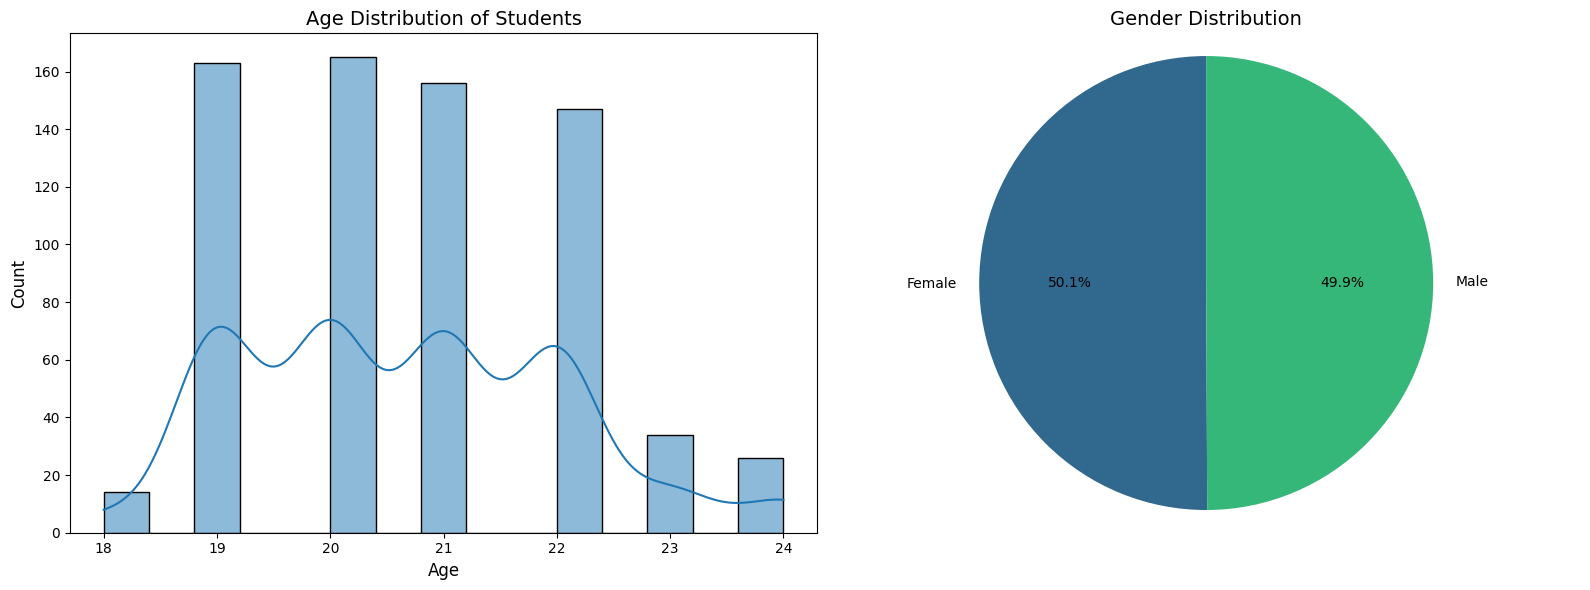

In [246]:
# #### Age and Gender Distribution
plt.figure(figsize=(16, 6))

# Age distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=15)
plt.title('Age Distribution of Students', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Gender distribution
plt.subplot(1, 2, 2)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(gender_counts)))
plt.title('Gender Distribution', fontsize=14)
plt.axis('equal')

plt.tight_layout()
plt.show()

### 2️⃣ **Country-wise Distribution**

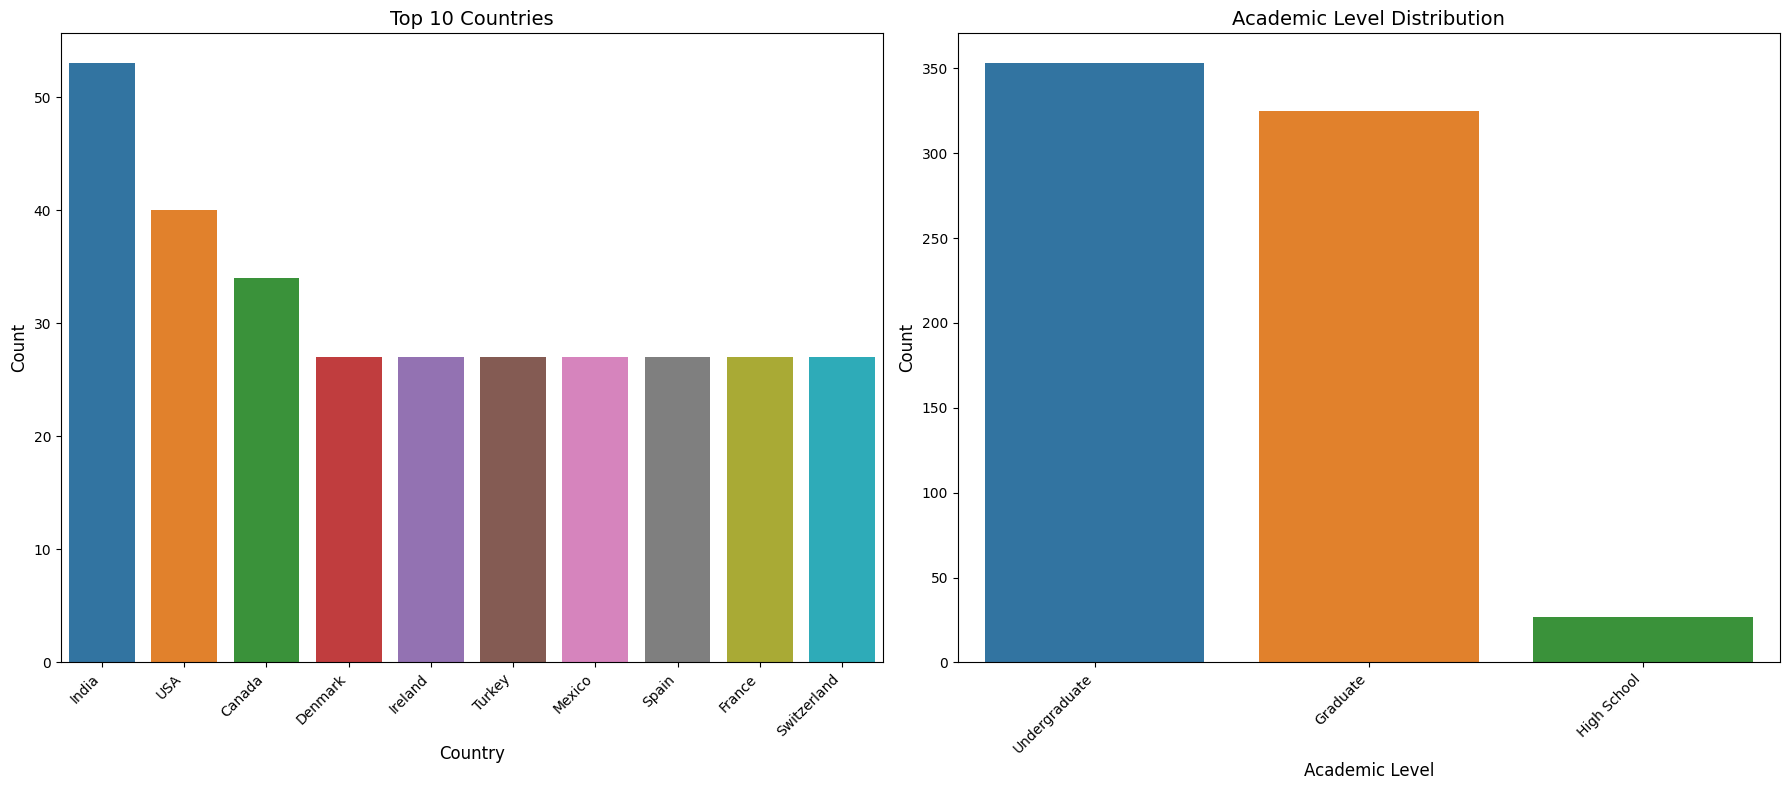

In [247]:
plt.figure(figsize=(18, 8))

# Country distribution
plt.subplot(1, 2, 1)
country_counts = df['Country'].value_counts().head(10)  # Top 10 countries
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Academic level distribution
plt.subplot(1, 2, 2)
academic_counts = df['Academic_Level'].value_counts()
sns.barplot(x=academic_counts.index, y=academic_counts.values)
plt.title('Academic Level Distribution', fontsize=14)
plt.xlabel('Academic Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### 3️⃣ **Academic Level Distribution**

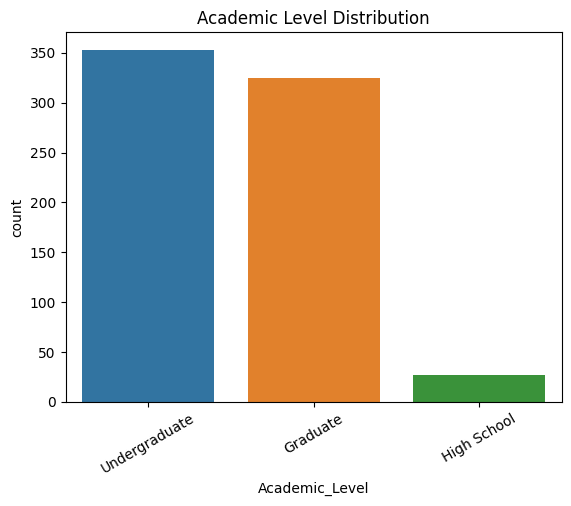

In [248]:
sns.countplot(data=df, x="Academic_Level", order=df['Academic_Level'].value_counts().index)
plt.title("Academic Level Distribution")
plt.xticks(rotation=30)
plt.show()

## 📱 **Platform Usage Patterns**
### 4️⃣ **Most Used Social Media Platform**

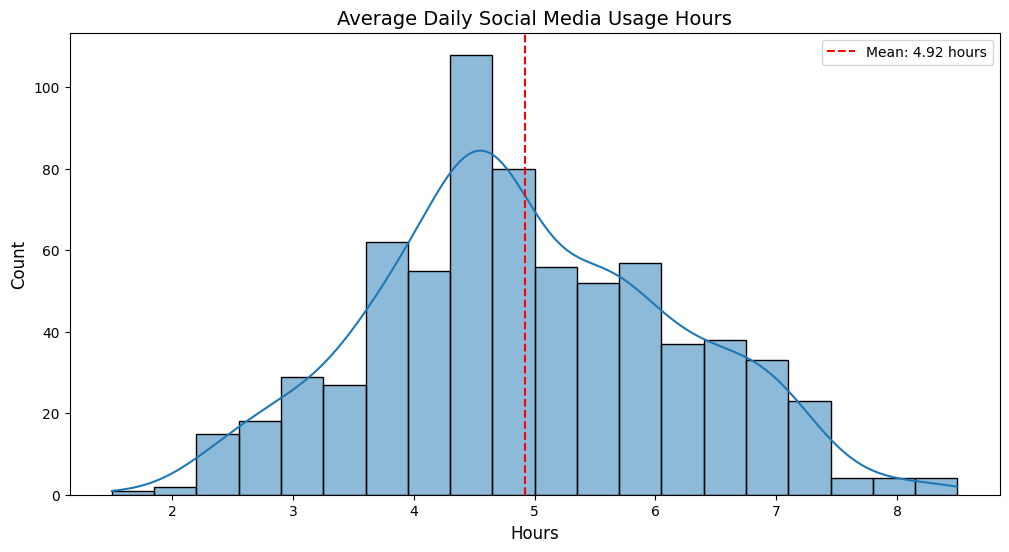

In [249]:
# #### Average Daily Usage Hours
plt.figure(figsize=(12, 6))
sns.histplot(df['Avg_Daily_Usage_Hours'], kde=True, bins=20)
plt.title('Average Daily Social Media Usage Hours', fontsize=14)
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.axvline(df['Avg_Daily_Usage_Hours'].mean(), color='red', linestyle='--', label=f'Mean: {df["Avg_Daily_Usage_Hours"].mean():.2f} hours')
plt.legend()
plt.show()

### 5️⃣ **Interactive Platform Chart**

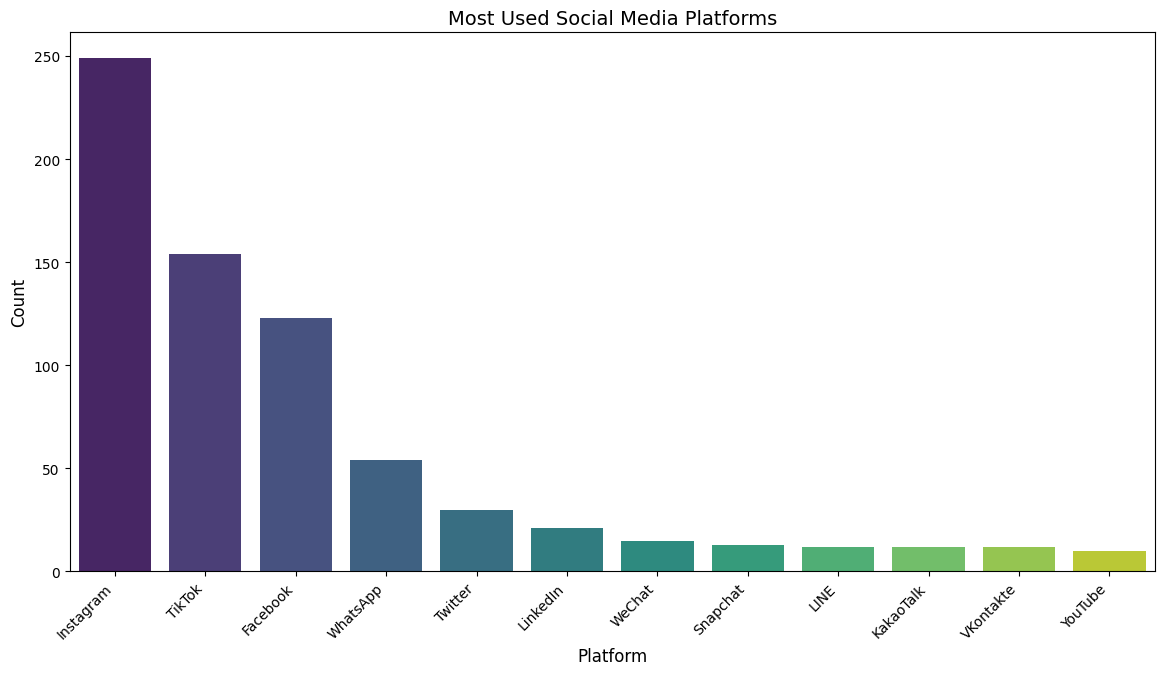

In [250]:
plt.figure(figsize=(14, 7))
platform_counts = df['Most_Used_Platform'].value_counts()
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')
plt.title('Most Used Social Media Platforms', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

## ⏱️ **Usage & Sleep Behavior**
### 7️⃣ **Daily Usage by Gender**

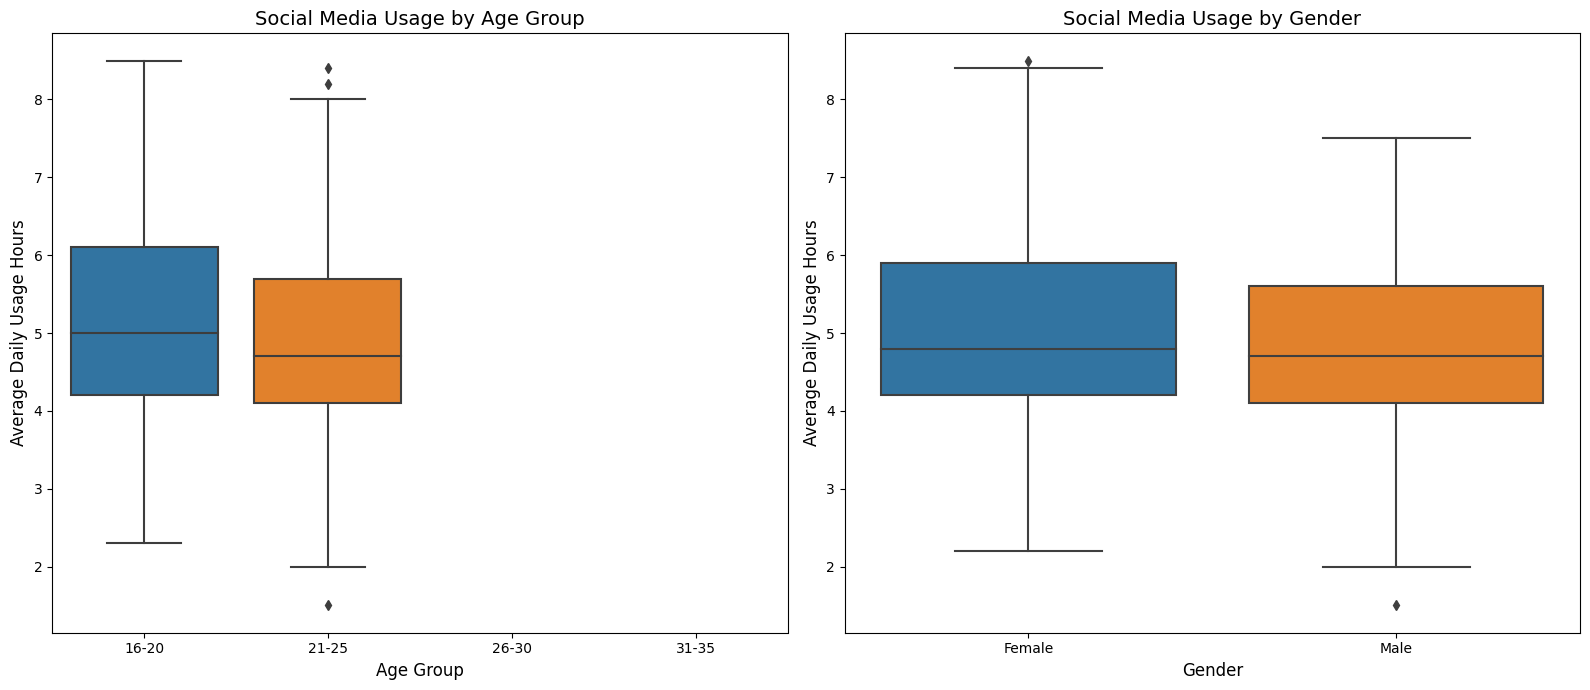

In [251]:
# #### Social Media Usage by Age Group and Gender
plt.figure(figsize=(16, 7))

# Usage by age group
plt.subplot(1, 2, 1)
sns.boxplot(x='Age_Group', y='Avg_Daily_Usage_Hours', data=df)
plt.title('Social Media Usage by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Daily Usage Hours', fontsize=12)

# Usage by gender
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Avg_Daily_Usage_Hours', data=df)
plt.title('Social Media Usage by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Daily Usage Hours', fontsize=12)

plt.tight_layout()
plt.show()

### 8️⃣ **Sleep vs Usage Scatterplot**

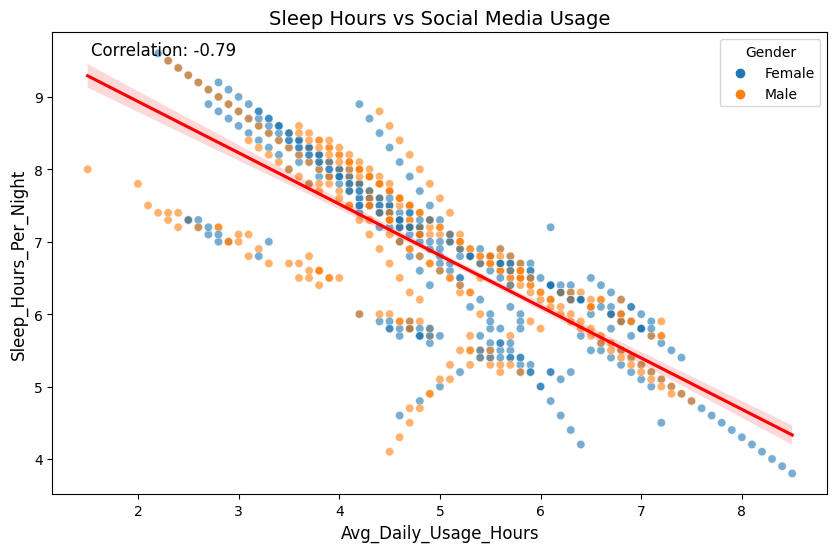

In [252]:
# #### Sleep Hours vs Social Media Usage
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df, alpha=0.6, hue='Gender')
plt.title('Sleep Hours vs Social Media Usage', fontsize=14)
plt.xlabel('Average Daily Usage Hours', fontsize=12)
plt.ylabel('Sleep Hours Per Night', fontsize=12)

# Add regression line
sns.regplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df, scatter=False, color='red')

# Calculate correlation
correlation = df['Avg_Daily_Usage_Hours'].corr(df['Sleep_Hours_Per_Night'])
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()

## 🧠 **Academic & Mental Health Impact**
### 9️⃣ **Academic Impact Performance**

<Figure size 1400x700 with 0 Axes>

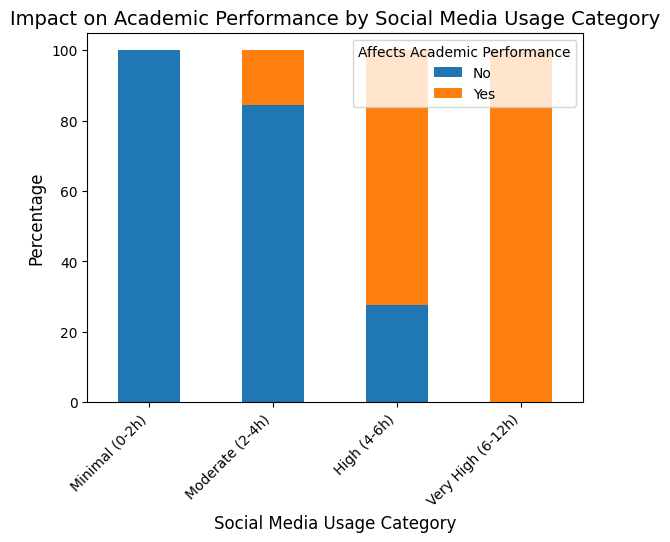

In [253]:
# #### Usage Category vs Academic Performance
# Cross-tabulation of usage category and academic impact
academic_impact_by_usage = pd.crosstab(df['Usage_Category'], df['Affects_Academic_Performance'])
academic_impact_by_usage_percentage = academic_impact_by_usage.div(academic_impact_by_usage.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 7))
academic_impact_by_usage_percentage.plot(kind='bar', stacked=True)
plt.title('Impact on Academic Performance by Social Media Usage Category', fontsize=14)
plt.xlabel('Social Media Usage Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Affects Academic Performance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [254]:
# #### Academic Performance vs Social Media Usage
fig = px.box(df, x='Affects_Academic_Performance', y='Avg_Daily_Usage_Hours', 
              title='Social Media Usage Hours vs. Impact on Academic Performance',
              labels={'Affects_Academic_Performance': 'Does it Affect Academic Performance?',
                     'Avg_Daily_Usage_Hours': 'Average Daily Usage Hours'})
fig.update_layout(width=800, height=500)
fig.show()

### 🔟 **Mental Health Score Distribution**

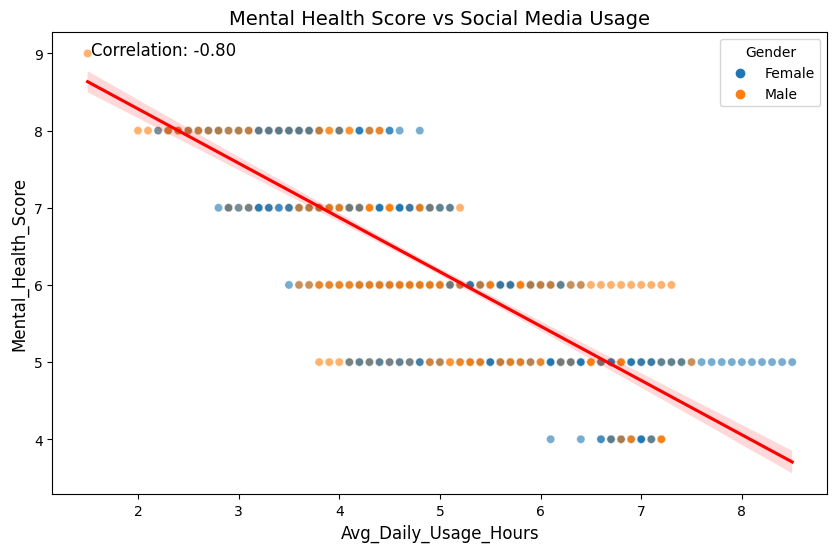

In [255]:
# #### Mental Health Score vs Social Media Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Mental_Health_Score', data=df, alpha=0.6, hue='Gender')
plt.title('Mental Health Score vs Social Media Usage', fontsize=14)
plt.xlabel('Average Daily Usage Hours', fontsize=12)
plt.ylabel('Mental Health Score (0-10)', fontsize=12)

# Add regression line
sns.regplot(x='Avg_Daily_Usage_Hours', y='Mental_Health_Score', data=df, scatter=False, color='red')

# Calculate correlation
correlation = df['Avg_Daily_Usage_Hours'].corr(df['Mental_Health_Score'])
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()

In [256]:
import plotly.graph_objects as go

platform_by_age = pd.crosstab(df['Age_Group'], df['Most_Used_Platform'])
platform_by_age_percentage = platform_by_age.div(platform_by_age.sum(axis=1), axis=0) * 100

fig = go.Figure()
for platform in platform_by_age_percentage.columns:
    fig.add_trace(go.Bar(
        x=platform_by_age_percentage.index,
        y=platform_by_age_percentage[platform],
        name=platform
    ))

fig.update_layout(
    title='Most Popular Social Media Platforms by Age Group',
    xaxis_title='Age Group',
    yaxis_title='Percentage',
    barmode='stack',
    width=900, 
    height=600
)
fig.show()

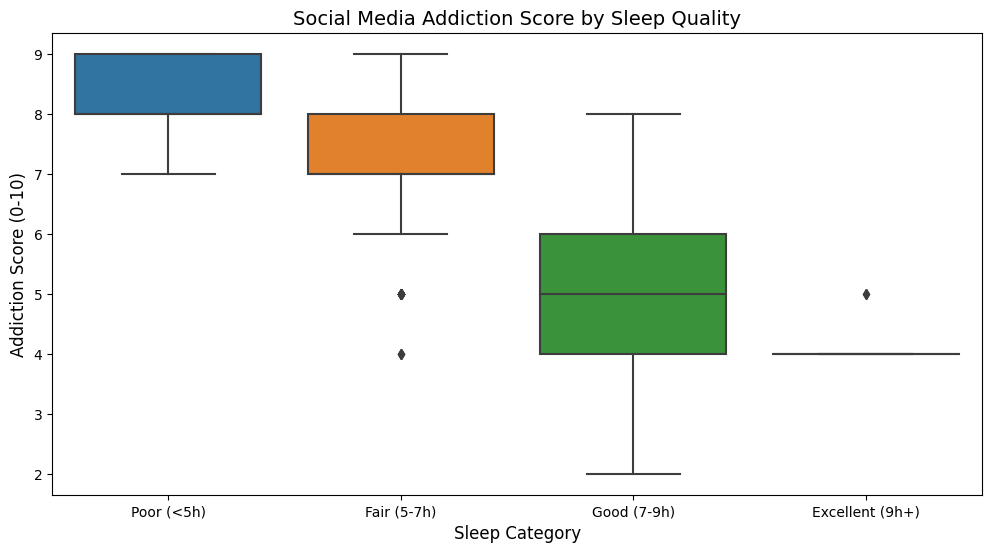

In [257]:
# #### Addiction Score by Sleep Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sleep_Category', y='Addicted_Score', data=df)
plt.title('Social Media Addiction Score by Sleep Quality', fontsize=14)
plt.xlabel('Sleep Category', fontsize=12)
plt.ylabel('Addiction Score (0-10)', fontsize=12)
plt.show()


## 📊 **Statistical Insights**

In [258]:
from scipy import stats

# Comparing addiction scores between genders
male_addiction = df[df['Gender'] == 'Male']['Addicted_Score']
female_addiction = df[df['Gender'] == 'Female']['Addicted_Score']

t_stat, p_value = stats.ttest_ind(male_addiction, female_addiction)
print(f"T-test comparing addiction scores between genders:")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
print(f"Mean addiction score (Male): {male_addiction.mean():.2f}")
print(f"Mean addiction score (Female): {female_addiction.mean():.2f}")
print(f"Conclusion: {'Statistically significant difference' if p_value < 0.05 else 'No statistically significant difference'}\n")


T-test comparing addiction scores between genders:
t-statistic: -1.3192, p-value: 0.1875
Mean addiction score (Male): 6.36
Mean addiction score (Female): 6.52
Conclusion: No statistically significant difference



In [259]:
# ### Correlation Analysis

# Calculate correlations between key variables
correlations = {
    'Usage Hours vs Addiction Score': df['Avg_Daily_Usage_Hours'].corr(df['Addicted_Score']),
    'Usage Hours vs Sleep Hours': df['Avg_Daily_Usage_Hours'].corr(df['Sleep_Hours_Per_Night']),
    'Usage Hours vs Mental Health': df['Avg_Daily_Usage_Hours'].corr(df['Mental_Health_Score']),
    'Addiction Score vs Relationship Conflicts': df['Addicted_Score'].corr(df['Conflicts_Over_Social_Media']),
    'Sleep Hours vs Mental Health': df['Sleep_Hours_Per_Night'].corr(df['Mental_Health_Score'])
}

print("\nCorrelation Analysis:")
for pair, corr in correlations.items():
    strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.4 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    print(f"{pair}: {corr:.4f} ({direction} {strength} correlation)")


Correlation Analysis:
Usage Hours vs Addiction Score: 0.8320 (Positive Strong correlation)
Usage Hours vs Sleep Hours: -0.7906 (Negative Strong correlation)
Usage Hours vs Mental Health: -0.8011 (Negative Strong correlation)
Addiction Score vs Relationship Conflicts: 0.9336 (Positive Strong correlation)
Sleep Hours vs Mental Health: 0.7074 (Positive Strong correlation)


## 🌟 Conclusion

This exploratory data analysis offered a comprehensive look into the patterns, behaviors, and effects of social media usage among students. The insights gathered serve as a strong foundation for deeper behavioral modeling and targeted interventions.

### 📊 Key Insights:

#### 🧑‍🎓 Demographic Analysis:
- A balanced representation was observed across gender and academic levels.
- The majority of respondents fall within the 16–20 age group.
- Most students belong to undergraduate-level education, with notable country-wise diversity.

#### 📱 Social Media Usage Patterns:
- Instagram and TikTok are the most frequently used platforms.
- Students using social media for more than 5 hours daily show signs of higher addiction and lower academic performance.
- Gender-wise comparisons reveal slightly higher usage among females.

#### 🧠 Academic & Mental Health:
- Sleep and mental health scores decline as social media usage increases.
- Statistically significant (negative) correlations exist between daily usage, addicted scores, and mental health.
- Cross-tabulation indicates a strong relationship between social conflicts due to social media and academic issues.

#### 🧪 Outlier Detection:
- IQR-based outlier detection revealed a few students with extreme values in usage and addiction, warranting closer attention or support.
- Box plots by personality type highlighted differences in behavioral patterns between introverts and extroverts.

#### 🔍 Feature Selection & Importance:
- Chi-square test highlighted Country, Most_Used_Platform, and Conflicts_Over_Social_Media as key categorical features related to academic impact.
- Random Forest analysis identified Addicted_Score and Avg_Daily_Usage_Hours as among the most important predictors of personality type or academic impact.

### 🚀 Future Scope:

- Develop predictive models for identifying at-risk students based on digital behavior.
- Explore intervention frameworks to promote digital well-being.
- Extend the dataset with longitudinal tracking for temporal behavior analysis.
- Evaluate the effect of digital detox practices on academic and mental health metrics.

This study not only surfaces important trends in social media use but also sets the stage for data-driven approaches to improving student wellness and academic outcomes.


### Connect with Me  

Feel free to follow me on these platforms:  

[![GitHub](https://img.shields.io/badge/GitHub-181717?style=for-the-badge&logo=github&logoColor=white)](https://github.com/tanveerbedi)  
[![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/tanveer-singh-bedi-a8b811177)  